In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Platinum.csv')
df.head(5)

,Open,Close,High,Low,Date
0,933.5,930.5,933.5,930.5,1/1/2018
1,931.0,945.5,946.5,931.0,1/2/2018
2,945.0,957.0,961.0,940.5,1/3/2018
3,955.0,964.0,966.5,945.0,1/4/2018
4,963.0,969.5,970.5,959.5,1/5/2018


In [3]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df.head(5)

,Open,Close,High,Low,Date
2120,1038.5,1038.5,1038.5,1038.5,2024-06-01
2119,1028.0,1038.5,1051.5,1020.0,2024-05-31
2118,1040.0,1031.5,1043.0,1022.5,2024-05-30
2117,1061.5,1040.5,1064.0,1036.0,2024-05-29
2116,1056.0,1059.5,1068.0,1045.0,2024-05-28


In [4]:
df1=df.reset_index()['Close']
df1

0       1038.5
1       1038.5
2       1031.5
3       1040.5
4       1059.5
         ...  
2116     969.5
2117     964.0
2118     957.0
2119     945.5
2120     930.5
Name: Close, Length: 2121, dtype: float64

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [10]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\admin\anaconda3\envs\py39env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0210 
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0024
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0010
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0010
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4597e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.1870e-04
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.3638e-04
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.0370e-04
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [12]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [13]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [14]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, ytest)
print('Testing MAPE:', test_mape)

#MSE
test_mse = mean_squared_error(y_pred, ytest)
print('Testing MSE:', test_mse)

Testing RMSE: 872.6737417617752
Testing MAPE: 0.9995634168517089
Testing MSE: 761544.9721715274


In [15]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.43811533 0.45007032 0.45007032 0.4416315  0.44374121 0.47257384
 0.45710267 0.46694796 0.4676512  0.47819972 0.4859353  0.48030942
 0.4697609  0.47116737 0.47116737 0.46835443 0.47327707 0.4697609
 0.47679325 0.4535865  0.44655415 0.45288326 0.46554149 0.47749648
 0.47116737 0.47398031 0.48171589 0.49226442 0.50421941 0.49859353
 0.49859353 0.5        0.50984529 0.49226442 0.50421941 0.49929677
 0.49648383 0.50421941 0.5140647  0.52109705 0.51898734 0.51969058
 0.52039381 0.50281294 0.50492264 0.52531646 0.51547117 0.52250352
 0.52250352 0.52461322 0.54922644 0.54571027 0.57032349 0.56540084
 0.56540084 0.56610408 0.55696203 0.57102672 0.58298172 0.57735584
 0.5766526  0.57102672 0.56540084 0.53445851 0.5281294  0.52109705
 0.52180028 0.53656821 0.54219409 0.55625879 0.55555556 0.5625879
 0.55766526 0.58227848 0.57243319 0.56610408 0.58016878 0.58579466
 0.58579466 0.59212377 0.59353024 0.58227848 0.56680731 0.58790436
 0.58720113 0.57313643 0.57172996 0.56891702 0.56680

In [16]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
n_steps=100
i=0
while(i<60):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1


0 day input [0.43811533 0.45007032 0.45007032 0.4416315  0.44374121 0.47257384
 0.45710267 0.46694796 0.4676512  0.47819972 0.4859353  0.48030942
 0.4697609  0.47116737 0.47116737 0.46835443 0.47327707 0.4697609
 0.47679325 0.4535865  0.44655415 0.45288326 0.46554149 0.47749648
 0.47116737 0.47398031 0.48171589 0.49226442 0.50421941 0.49859353
 0.49859353 0.5        0.50984529 0.49226442 0.50421941 0.49929677
 0.49648383 0.50421941 0.5140647  0.52109705 0.51898734 0.51969058
 0.52039381 0.50281294 0.50492264 0.52531646 0.51547117 0.52250352
 0.52250352 0.52461322 0.54922644 0.54571027 0.57032349 0.56540084
 0.56540084 0.56610408 0.55696203 0.57102672 0.58298172 0.57735584
 0.5766526  0.57102672 0.56540084 0.53445851 0.5281294  0.52109705
 0.52180028 0.53656821 0.54219409 0.55625879 0.55555556 0.5625879
 0.55766526 0.58227848 0.57243319 0.56610408 0.58016878 0.58579466
 0.58579466 0.59212377 0.59353024 0.58227848 0.56680731 0.58790436
 0.58720113 0.57313643 0.57172996 0.56891702 0.56680

In [17]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1


0 day input [0.43811533 0.45007032 0.45007032 0.4416315  0.44374121 0.47257384
 0.45710267 0.46694796 0.4676512  0.47819972 0.4859353  0.48030942
 0.4697609  0.47116737 0.47116737 0.46835443 0.47327707 0.4697609
 0.47679325 0.4535865  0.44655415 0.45288326 0.46554149 0.47749648
 0.47116737 0.47398031 0.48171589 0.49226442 0.50421941 0.49859353
 0.49859353 0.5        0.50984529 0.49226442 0.50421941 0.49929677
 0.49648383 0.50421941 0.5140647  0.52109705 0.51898734 0.51969058
 0.52039381 0.50281294 0.50492264 0.52531646 0.51547117 0.52250352
 0.52250352 0.52461322 0.54922644 0.54571027 0.57032349 0.56540084
 0.56540084 0.56610408 0.55696203 0.57102672 0.58298172 0.57735584
 0.5766526  0.57102672 0.56540084 0.53445851 0.5281294  0.52109705
 0.52180028 0.53656821 0.54219409 0.55625879 0.55555556 0.5625879
 0.55766526 0.58227848 0.57243319 0.56610408 0.58016878 0.58579466
 0.58579466 0.59212377 0.59353024 0.58227848 0.56680731 0.58790436
 0.58720113 0.57313643 0.57172996 0.56891702 0.56680

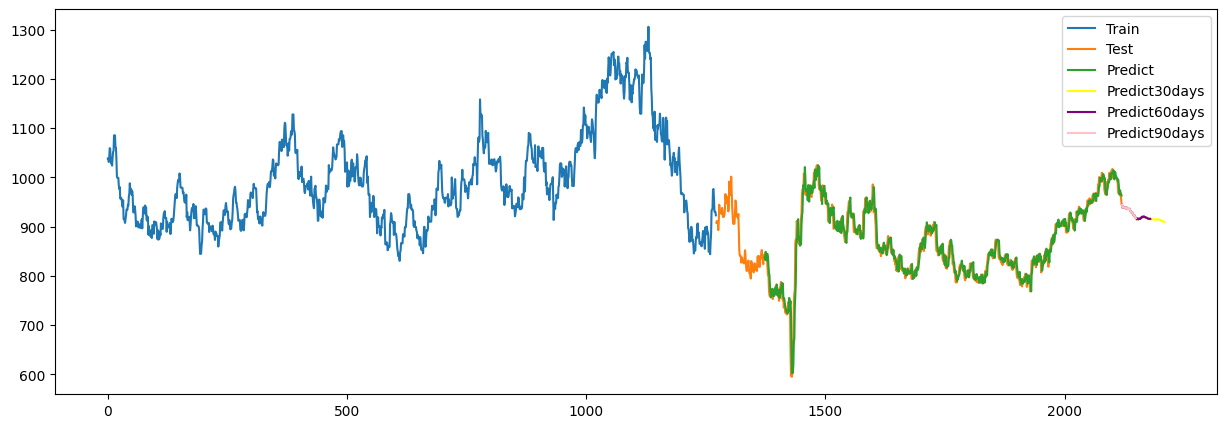

In [18]:
# 14.Vẽ hình
plt.figure(figsize=(15,5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_90days_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_90days_data_index,scaler.inverse_transform(lst_output_90), color='yellow')

prediect_60days_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_60days_data_index,scaler.inverse_transform(lst_output_60), color='purple')

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output), color='pink')

plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.show()